In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Dask Section
Tasks=[2**i for i in range(0,18)]
fixed=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Wrangler/differentZeroWorkloads/fixed/DaskTimings_%d.npz.npy'%i)
    fixed[:,i]=times[:,1]-times[:,0]

random=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Wrangler/differentZeroWorkloads/random/DaskTimings_%d.npz.npy'%i)
    random[:,i]=times[:,1]-times[:,0]


sleep0=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Wrangler/differentZeroWorkloads/sleep0/DaskTimings_%d.npz.npy'%i)
    sleep0[:,i]=times[:,1]-times[:,0]


sleep2ms=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Wrangler/differentZeroWorkloads/sleep2ms/DaskTimings_%d.npz.npy'%i)
    sleep2ms[:,i]=times[:,1]-times[:,0]

    
sleep20ms=np.zeros((18,10))
for i in range(0,10):
    times=np.load('Wrangler/differentZeroWorkloads/sleep20ms/DaskTimings_%d.npz.npy'%i)
    sleep20ms[:,i]=times[:,1]-times[:,0]



Yesterday's convertation about Figure 2 of the paper raised the question whether of not Dask's scheduler gets saturated because we use ```/bin/hostname``` for our zero workload. 5 different configurations of this experiment were run. The first 4 do zero or almost workload per task. The fifth execution a sleep of 20ms per task.
The configuration are:

  * Fixed: ```/bin/hostname``` and the tasks are submitted in order from 1 up to 131072
  * Random: ```/bin/hostname``` and the tasks are submitted randomly
  * Sleep 0: ```/bin/sleep 0``` and the tasks are submitted randomly
  * Sleep 2ms: ```/bin/sleep 0.002``` and the tasks are submitted randomly
  * Sleep 20ms: ```/bin/sleep 0.02``` and the tasks are submitted randomly
  
As we see execution times in small tasks counts, when the scheduler is not saturated, are not increasing in steady fashion. This mainly the case for number of tasks where the total execution time is below a second.

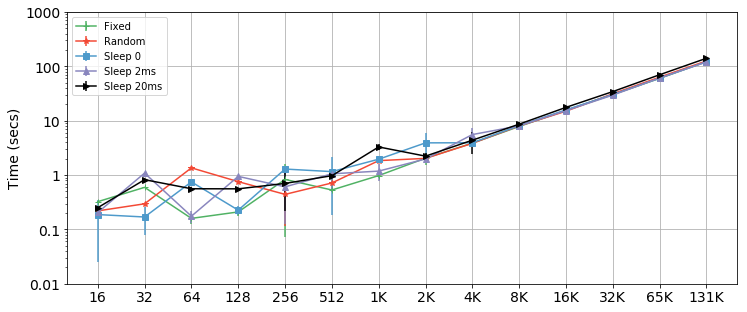

In [3]:
fig,axes = plt.subplots(nrows=1,ncols=1,sharex=True)
fig.set_size_inches(12,5)
axes.errorbar(Tasks[4:],fixed[4:].mean(axis=1),yerr=fixed[4:].std(axis=1),marker='+',label='Fixed',color=greens(150))
axes.errorbar(Tasks[4:],random[4:].mean(axis=1),yerr=random[4:].std(axis=1),marker='*',label='Random',color=reds(150))
axes.errorbar(Tasks[4:],sleep0[4:].mean(axis=1),yerr=sleep0[4:].std(axis=1),marker='s',label='Sleep 0 ',color=blues(150))
axes.errorbar(Tasks[4:],sleep2ms[4:].mean(axis=1),yerr=sleep2ms[4:].std(axis=1),marker='^',label='Sleep 2ms',color=purples(150))
axes.errorbar(Tasks[4:],sleep20ms[4:].mean(axis=1),yerr=sleep2ms[4:].std(axis=1),marker='>',label='Sleep 20ms',color='black')
axes.set_yscale('log',basey=10)
axes.set_ylim(0.01,1000)
axes.set_yticklabels(['0.001','0.01','0.1','1','10','100','1000'],fontsize=14)
axes.set_xscale('log',basex=2)
axes.grid('on')
axes.set_ylabel('Time (secs)',fontsize=14)
axes.set_xticks(Tasks[4:])
axes.set_xticklabels(['16','32','64','128','256','512','1K','2K','4K','8K','16K','32K','65K','131K'],fontsize=14)
axes.legend()